In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# Generación aleatoria de datos sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, loc=2.5, size=cantidad, random_state=0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2) / aleatorios.max() * maximo
    return np.round(aleatorios, 1)

edades = datos_sesgados(3, 100000, 62)

edades[:5]  # muestra los primeros valores

edades.min()

np.float64(19.5)

In [2]:
plt.figure(figsize=(10,6))
plt.hist(promedios_muestras,bins=100,color="skyblue",edgecolor="gray",alpha=0.7)
plt.axvline(media,color="red",linestyle="--",linewidth=2, label=f'media:{media:.2f}')
plt.axvline(media,color="blue",linestyle="--",linewidth=2, label=f'Q0.025:{q_025:.2f}')
plt.axvline(media,color="blue",linestyle="--",linewidth=2, label=f'Q0.975:{q_0975:.2f}')
plt.axvline(media_inicial,color="green",linestyle="--",linewidth=2, label=f'media inicial:{media_inicial:.2f}')
#Añadir etiquetas y leyenda
plt.xlabel("Edades promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades promedio con intervalos de confianza")
plt.legend()
plt.grid(axis="y",alpha=0.75)
plt.show()

NameError: name 'promedios_muestras' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np

# Obtener la fecha actual en formato dd/mm/yyyy
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

# Definir el ticker y el rango de fechas
ticker = "BTC-USD"
start_date = "2023-10-18"
end_date = "2024-10-18"

# Descargar los datos de Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Mostrar las primeras filas del DataFrame
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-10-18  28328.341797  28889.009766  28174.251953  28413.531250   
2023-10-19  28719.806641  28892.474609  28177.988281  28332.416016   
2023-10-20  29682.949219  30104.085938  28601.669922  28732.812500   
2023-10-21  29918.412109  30287.482422  29481.751953  29683.380859   
2023-10-22  29993.896484  30199.433594  29720.312500  29918.654297   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-10-18  12724128586  
2023-10-19  14448058195  
2023-10-20  21536125230  
2023-10-21  11541146996  
2023-10-22  10446520040  


In [4]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=5324706ade7ad9a53936578b5ccc8759c079c7622b60aae0e9567ecbd513c65e
  Stored in directory: c:\users\nicor\appdata\local\pip\cache\wheels\f4\14\e4\50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-10-18,28328.341797,28889.009766,28174.251953,28413.531250,12724128586
2023-10-19,28719.806641,28892.474609,28177.988281,28332.416016,14448058195
2023-10-20,29682.949219,30104.085938,28601.669922,28732.812500,21536125230
2023-10-21,29918.412109,30287.482422,29481.751953,29683.380859,11541146996
2023-10-22,29993.896484,30199.433594,29720.312500,29918.654297,10446520040
...,...,...,...,...,...
2024-10-13,62851.375000,63272.652344,62035.636719,63192.945312,18177529690
2024-10-14,66046.125000,66482.492188,62442.152344,62848.398438,43706958056


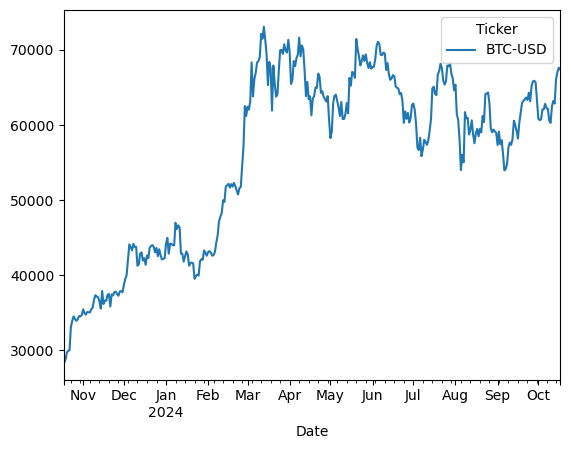

In [8]:
data['Close'].plot()
plt.show()

In [9]:
datos=pd.DataFrame(data['Close'])

In [10]:
datos['Log_Return'] = np.log(datos['BTC-USD'] / datos['BTC-USD'].shift(-1))


In [11]:
datos_invertidos=datos[::-1].fillna(0)

In [13]:
import random
tamano_muestra=100
muestra=datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

Date
2024-10-17    0.000000
2024-10-16    0.003154
2024-10-15   -0.008490
2024-10-14   -0.014953
2024-10-13   -0.049581
                ...   
2024-07-14   -0.064999
2024-07-13   -0.025928
2024-07-12   -0.022753
2024-07-11   -0.009624
2024-07-10    0.006909
Name: Log_Return, Length: 100, dtype: float64

In [14]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras): 
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))
    
muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[-0.00936755,  0.02828177,  0.02024486, ..., -0.000362  ,
        -0.00617761,  0.00253331],
       [ 0.00453479, -0.00107858, -0.00353292, ...,  0.01687495,
         0.01354163, -0.00617761],
       [-0.03571709, -0.000362  , -0.11461586, ...,  0.01379834,
         0.03576248,  0.04015297],
       ...,
       [ 0.00315353, -0.02092454, -0.00349313, ...,  0.01305211,
        -0.00400401, -0.02291143],
       [ 0.00168357,  0.04017886,  0.00315353, ...,  0.01203949,
         0.05519288,  0.07363199],
       [-0.04119072,  0.00253331, -0.03571709, ..., -0.00147305,
        -0.11461586,  0.0248315 ]])

In [15]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias 

array([[ 0.0248315 ,  0.00383726,  0.0084622 ,  0.00253331,  0.00225971,
         0.00930535, -0.00400401, -0.04187942, -0.02592785, -0.03894551,
         0.0014548 ,  0.0313783 ,  0.01514324, -0.03894551, -0.0116727 ,
         0.01379834,  0.02526116,  0.00690925, -0.03894551, -0.00107858,
        -0.000362  ,  0.04315788, -0.01464538,  0.02284251,  0.01379834,
        -0.00608966, -0.00400401, -0.0039966 ,  0.02418345, -0.00849011,
        -0.00677495,  0.02828177,  0.01354163, -0.00930963,  0.02526116,
         0.00930535,  0.00531411,  0.01818596, -0.00677495, -0.0119063 ,
        -0.02092454, -0.02072112,  0.00531411, -0.03894551,  0.00502307,
         0.00253331,  0.03576248, -0.03598749,  0.00930535, -0.00608966,
        -0.03069673,  0.02126225,  0.00336253, -0.01523424, -0.00936755,
        -0.0116727 , -0.00353292, -0.03193999, -0.03598749, -0.0031893 ,
         0.00336253, -0.0135767 , -0.06499862, -0.0116727 ,  0.00542109,
        -0.000362  ,  0.02885744, -0.00962398,  0.0

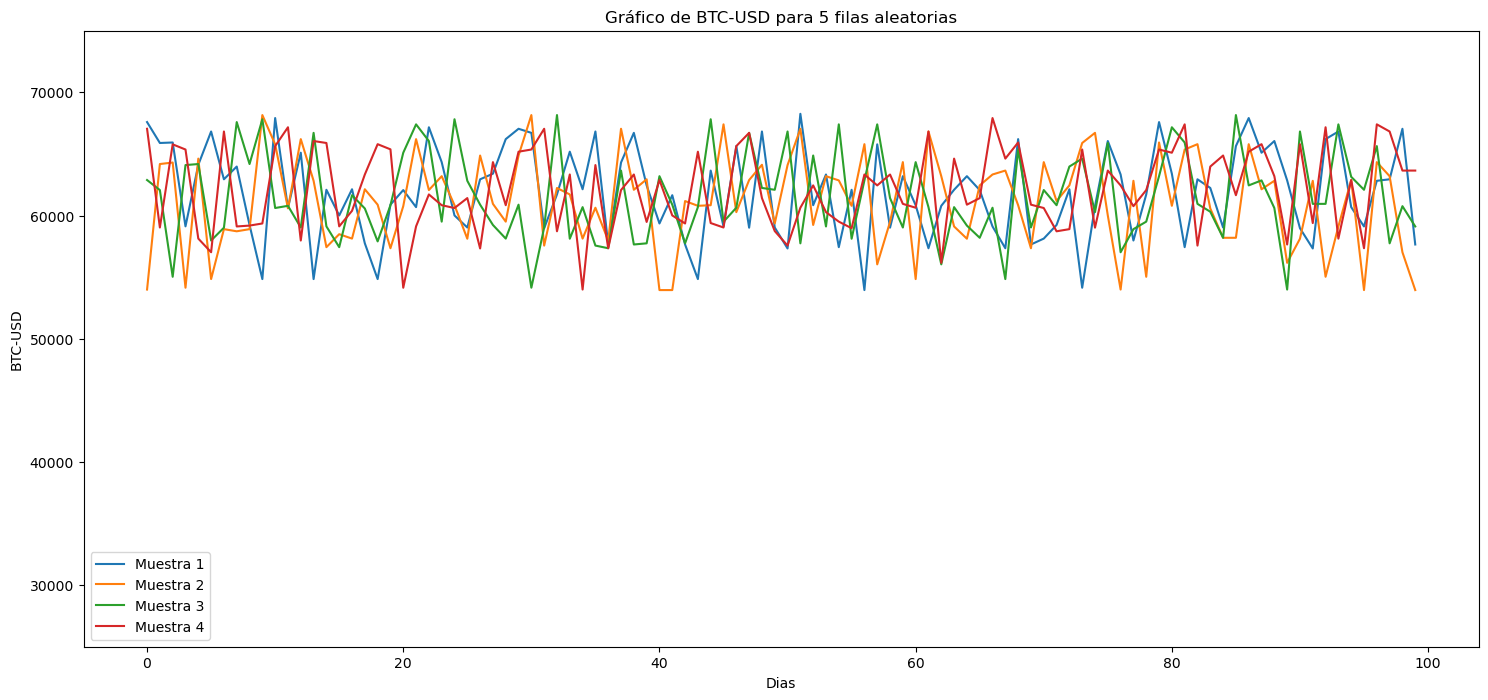

In [16]:
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])
    
    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')
    
    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['BTC-USD'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(25000, 75000)
plt.title('Gráfico de BTC-USD para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('BTC-USD')
plt.legend()
plt.show()

In [17]:
#Procedemos a crear una funcion que modele el proceso estocastico
def MGB_acciones(mu,sigma,data,col_name,steps):

    #Los parametros de la funcion son:
    #mu -> Tasa de crecimiento esperada
    #sigma -> volatilidad del activo
    #data -> pandas df que contiene los retornos logaritmicos del activo en dias
    #col_name -> nombre de la columna de los retornos
    #steps -> numero de pasos hacia adelante en el proceso estocastico

    dt=1/252 # son solo 252 dias de traiding en el año.
    s0=data[col_name].iloc[-1] #Tomamos el ultimo elemento de los precios, ya que este sera el punto de partida
    et_vector=np.random.normal(loc=0, scale=1, size=steps) # Vector de numeros aletorios de media 0 y desviacion estandar 1
    exp_vector = np.exp((mu - (sigma**2) / 2) * dt + sigma * et_vector * np.sqrt(dt))

    st_1=[]

    for i in range(0,steps):

        if i==0:
            s=s0*exp_vector[0]
        else:
            s=st_1[i-1]*exp_vector[i]

        st_1.append(s)


    return st_1

#Probamos la funcion
#MGB_acciones(mu, sigma, data, 'Adj Close',252)

In [20]:
Montecarlo_results = pd.DataFrame()
N=len(datos_invertidos)-1 #Menos 1 porque el primer elemento no tiene retorno
mu=datos_invertidos['Log_Return'].sum()/N
N = len(datos_invertidos['Log_Return']) -1 # Número total de retornos
sigma = np.sqrt(np.sum((datos_invertidos['Log_Return'] - mu)**2) / (N - 1))
x=pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))

In [25]:
x

0     -0.013705
1     -0.013707
2     -0.013688
3     -0.013678
4     -0.013669
         ...   
247   -0.014099
248   -0.014106
249   -0.014133
250   -0.014118
251   -0.014075
Length: 252, dtype: float64

In [26]:
Montecarlo_results['sim_']=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])

C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\3950297324.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_']=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])


In [29]:
datos_invertidos.head()

Ticker,BTC-USD,Log_Return
Date,,
2024-10-17,67399.835938,0.000000
2024-10-16,67612.718750,0.003154
2024-10-15,67041.109375,-0.008490
2024-10-14,66046.125000,-0.014953
2024-10-13,62851.375000,-0.049581


In [24]:
Montecarlo_results = pd.DataFrame()
N=len(datos_invertidos)-1 #Menos 1 porque el primer elemento no tiene retorno
mu=datos_invertidos['Log_Return'].sum()/N
N = len(datos_invertidos['Log_Return']) -1 # Número total de retornos
sigma = np.sqrt(np.sum((datos_invertidos['Log_Return'] - mu)**2) / (N - 1))
sim=500

for i in range(0,sim):

    print(i)

    Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])#probara con un merge revisar index
Montecarlo_results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451


C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\AppData\Local\Temp\ipykernel_39528\559891078.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([datos_invertidos['BTC-USD'],pd.Series(MGB_acciones(mu, sigma, datos_invertidos, 'Log_Return',252))])
C:\Users\nicor\A

452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499


,sim_0,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,...,sim_490,sim_491,sim_492,sim_493,sim_494,sim_495,sim_496,sim_497,sim_498,sim_499
2024-10-17 00:00:00,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,...,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938,67399.835938
2024-10-16 00:00:00,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,...,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750,67612.718750
2024-10-15 00:00:00,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,...,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375,67041.109375
2024-10-14 00:00:00,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,...,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000,66046.125000
2024-10-13 00:00:00,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,...,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000,62851.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-0.013760,-0.013421,-0.013911,-0.013631,-0.013387,-0.014202,-0.013862,-0.014097,-0.012882,-0.013729,...,-0.013277,-0.013511,-0.014267,-0.013161,-0.013741,-0.013356,-0.013946,-0.014442,-0.013448,-0.013395
248,-0.013722,-0.013443,-0.013858,-0.013641,-0.013387,-0.014156,-0.013862,-0.014099,-0.012856,-0.013737,...,-0.013260,-0.013498,-0.014242,-0.013168,-0.013764,-0.013339,-0.013964,-0.014424,-0.013449,-0.013408
249,-0.013718,-0.013446,-0.013894,-0.013624,-0.013375,-0.014176,-0.013866,-0.014139,-0.012853,-0.013744,...,-0.013237,-0.013525,-0.014201,-0.013146,-0.013755,-0.013321,-0.013945,-0.014428,-0.013445,-0.013420
250,-0.013754,-0.013467,-0.013898,-0.013645,-0.013344,-0.014167,-0.013877,-0.014137,-0.012855,-0.013728,...,-0.013277,-0.013528,-0.014185,-0.013166,-0.013758,-0.013305,-0.013953,-0.014426,-0.013418,-0.013447


In [23]:
# Resetear el índice para evitar problemas al hacer el merge
datos_invertidos_reset = datos_invertidos[['BTC-USD']].reset_index()
simulacion_reset = simulacion.reset_index()

# Hacer merge usando el índice como clave
Montecarlo_results = datos_invertidos_reset.merge(simulacion_reset, left_index=True, right_index=True)


AttributeError: 'DataFrame' object has no attribute 'plt'